## Import modules and data

In [1]:
# https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../data/COST.csv')
df.head()

,Date,Close
0,7/2/2018,207.990005
1,7/3/2018,207.119995
2,7/5/2018,209.139999
3,7/6/2018,209.619995
4,7/9/2018,210.940002


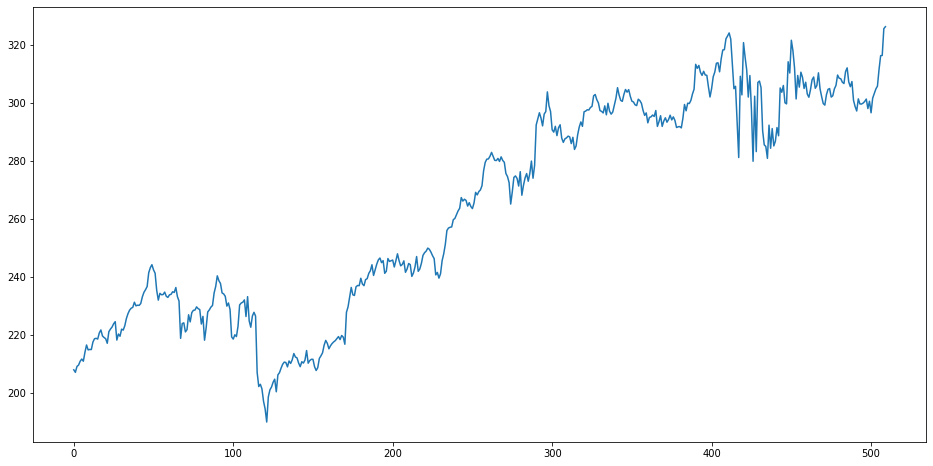

In [3]:
# What historical stock prices actually looked like
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [4]:
model_data = df.iloc[0:370,:]
model_data.head()

,Date,Close
0,2018-07-02,207.990005
1,2018-07-03,207.119995
2,2018-07-05,209.139999
3,2018-07-06,209.619995
4,2018-07-09,210.940002


## Create and train the model

In [5]:
# Use train, test, split to training and testing data
from sklearn.model_selection import train_test_split

input_data = []
output_data = []

for i in range(60,len(model_data)):
    input_data.append(model_data.loc[i-60:i,"Close"])
    output_data.append(model_data.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [7]:
# Reshape training data to fit model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [8]:
# Fit the model
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(X_train_scaled,y_train_scaled,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
8/8 - 1s - loss: 0.1694
Epoch 2/5
8/8 - 1s - loss: 0.0278
Epoch 3/5
8/8 - 1s - loss: 0.0149
Epoch 4/5
8/8 - 1s - loss: 0.0062
Epoch 5/5
8/8 - 1s - loss: 0.0062


## Test the model

In [9]:
# Reshape testing data to fit model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [10]:
# Evaluate the model using the testing data
model_loss = lstm_model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

3/3 - 0s - loss: 0.0061
Loss: 0.006061880383640528


In [11]:
# Predict y values for test data to see how closely they match actual values
predicted_closing_price=lstm_model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[297.62198],
       [237.10081],
       [228.68616],
       [222.8972 ],
       [230.95303],
       [216.39558],
       [215.99803],
       [259.08618],
       [290.22354],
       [232.37929],
       [211.17767],
       [249.01608],
       [297.69647],
       [294.39212],
       [296.4584 ],
       [297.785  ],
       [239.42296],
       [247.91711],
       [249.39507],
       [249.8831 ],
       [210.40482],
       [219.09976],
       [246.25761],
       [276.99136],
       [211.59717],
       [249.11258],
       [223.89522],
       [235.22314],
       [294.96045],
       [289.3074 ],
       [220.88184],
       [239.59544],
       [214.41995],
       [287.91412],
       [215.88208],
       [217.81516],
       [232.50928],
       [232.37805],
       [268.4207 ],
       [231.50113],
       [234.24004],
       [231.04454],
       [253.59183],
       [289.75793],
       [297.31265],
       [267.6929 ],
       [275.14874],
       [238.64104],
       [297.05646],
       [212.07747],


In [12]:
predictions = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [13]:
test_data = pd.DataFrame({"Predicted": predictions})
test_data

,Predicted
0,297.621979
1,237.100815
2,228.686157
3,222.897202
4,230.953033
...,...
73,232.728485
74,231.678375
75,289.143188
76,230.204193


In [14]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[302.23999 ],
       [224.169998],
       [202.990005],
       [194.520004],
       [228.630005],
       [201.080002],
       [207.75    ],
       [266.130005],
       [291.410004],
       [231.279999],
       [211.029999],
       [249.509995],
       [299.809998],
       [293.5     ],
       [302.899994],
       [300.570007],
       [233.199997],
       [247.020004],
       [248.529999],
       [241.539993],
       [210.509995],
       [218.050003],
       [246.330002],
       [280.829987],
       [210.179993],
       [251.210007],
       [232.960007],
       [234.479996],
       [299.839996],
       [288.26001 ],
       [219.820007],
       [234.649994],
       [209.070007],
       [291.890015],
       [208.720001],
       [216.289993],
       [231.      ],
       [229.669998],
       [276.540009],
       [236.979996],
       [219.449997],
       [227.919998],
       [260.149994],
       [291.899994],
       [295.670013],
       [271.420013],
       [275.679993],
       [218.8

In [15]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
test_data["Actual"] = actuals
test_data

,Predicted,Actual
0,297.621979,302.239990
1,237.100815,224.169998
2,228.686157,202.990005
3,222.897202,194.520004
4,230.953033,228.630005
...,...,...
73,232.728485,240.369995
74,231.678375,218.190002
75,289.143188,297.600006
76,230.204193,202.229996


In [16]:
lstm_model.save("../models/COST_model.h5")

## Use the model to predict stock prices 

In [17]:
inputs = []

for i in range(370,len(df)):
    inputs.append(df.loc[i-60:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [18]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [19]:
forecasted_closing_price = lstm_model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[293.5706 ],
       [293.35535],
       [293.14072],
       [292.97052],
       [292.86285],
       [292.76782],
       [292.7163 ],
       [292.65503],
       [292.5252 ],
       [292.37088],
       [292.19485],
       [291.99426],
       [291.89084],
       [291.96497],
       [292.10504],
       [292.36432],
       [292.6706 ],
       [293.04977],
       [293.51743],
       [294.07068],
       [294.89508],
       [295.82285],
       [296.83057],
       [297.76813],
       [298.63138],
       [299.4381 ],
       [300.14624],
       [300.77472],
       [301.20435],
       [301.4089 ],
       [301.52097],
       [301.66818],
       [301.89133],
       [302.21335],
       [302.60202],
       [302.93692],
       [303.35175],
       [303.8635 ],
       [304.43146],
       [305.1182 ],
       [305.86615],
       [306.67538],
       [307.4297 ],
       [307.9099 ],
       [307.97437],
       [307.80222],
       [307.12946],
       [305.86487],
       [304.98578],
       [304.12592],


In [20]:
forecasts = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [21]:
forecast_data = df.iloc[370:,:]
forecast_data

,Date,Close
370,2019-12-19,293.709991
371,2019-12-20,294.829987
372,2019-12-23,293.309998
373,2019-12-24,294.230011
374,2019-12-26,295.730011
...,...,...
505,2020-07-06,311.489990
506,2020-07-07,316.230011
507,2020-07-08,316.320007
508,2020-07-09,325.540009


In [22]:
forecast_data["Prediction"] = forecasts
forecast_data

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
370,2019-12-19,293.709991,293.570587
371,2019-12-20,294.829987,293.355347
372,2019-12-23,293.309998,293.140717
373,2019-12-24,294.230011,292.970520
374,2019-12-26,295.730011,292.862854
...,...,...,...
505,2020-07-06,311.489990,298.206116
506,2020-07-07,316.230011,298.804382
507,2020-07-08,316.320007,299.570587
508,2020-07-09,325.540009,300.660980


In [23]:
forecast_data.to_csv("../data/predictions/COST.csv")

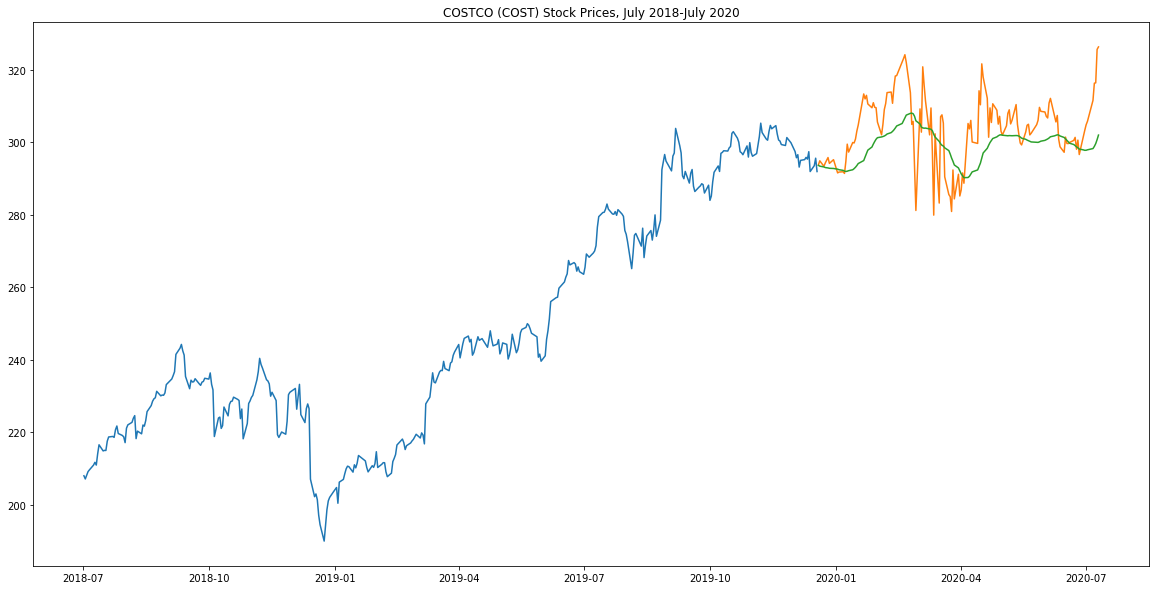

In [24]:
model_data = model_data.set_index("Date")
forecast_data = forecast_data.set_index("Date")
plt.plot(model_data["Close"])
plt.plot(forecast_data[['Close',"Prediction"]])
plt.title("COSTCO (COST) Stock Prices, July 2018-July 2020")
plt.savefig("../charts/COST.png")